# Laboratorio 8

Mark Albrand 21004
Jimena Hernadez 21199

## Netflix Titles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_titles = pd.read_csv('data/netflix_titles.csv')

netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Exploración de datos

In [3]:
netflix_titles.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [4]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix_titles.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
netflix_titles.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Mensaje a transmitir

#### La cantidad de películas y series en Netflix ha ido aumentando con el tiempo.

In [ ]:
netflix_titles['date_added'] = netflix_titles['date_added'].str.strip()
netflix_titles['date_added'] = pd.to_datetime(netflix_titles['date_added'])

In [ ]:
netflix_titles['release_year'] = netflix_titles['release_year'].astype(int)  # Año de lanzamiento de la película o serie
netflix_titles['year_added'] = netflix_titles['date_added'].dt.year # Año en que se agregó a netflix

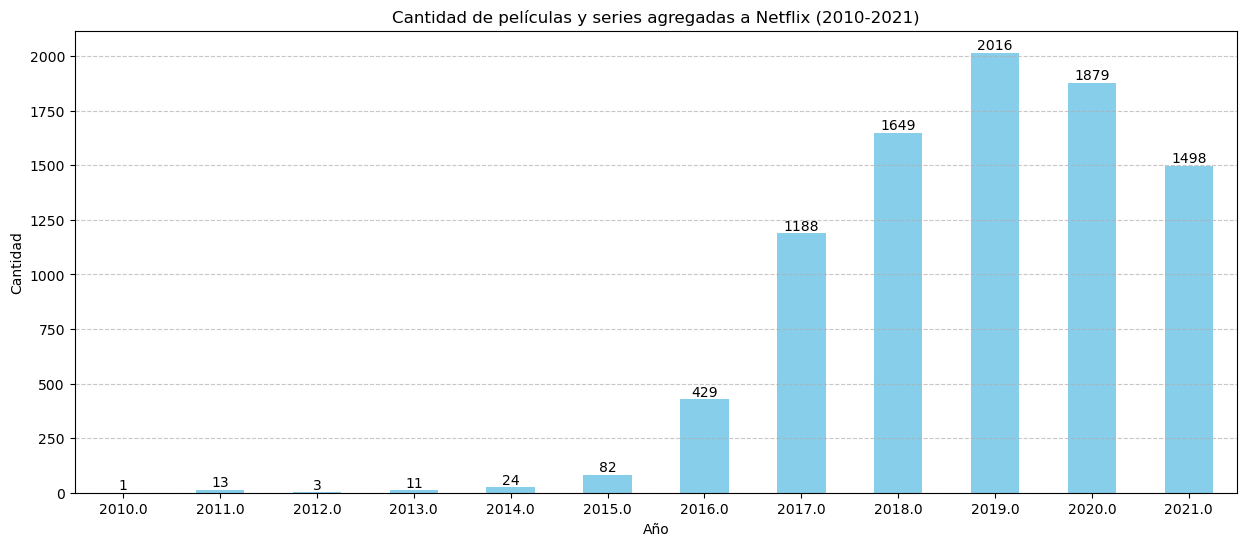

In [34]:
filtered_data = netflix_titles[netflix_titles['year_added'].between(2010, 2021)]
counts = filtered_data['year_added'].value_counts().sort_index()

counts.plot(kind='bar', figsize=(15, 6), color='skyblue')

plt.title('Cantidad de películas y series agregadas a Netflix (2010-2021)')
plt.xlabel('Año')
plt.ylabel('Cantidad')

plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

Para reducir la carga cognitiva, se decidió lo siguiente:

- Colores más suaves: Se decidió utilizar colores más suaves para que la visualización no sea tan agresiva a la vista.
- Títulos claros: Se decidió utilizar títulos claros y concisos para que el mensaje a transmitir sea más fácil de entender.
- Cuadrícula: Se decidió utilizar una cuadrícula para que la visualización sea más fácil de leer y comparar.
- Etiquetas de valores: Se decidió utilizar etiquetas de valores para que el lector pueda entender mejor la visualización.
- Limitar el rango de valores: Se decidió limitar el rango de valores para que la visualización sea más clara y fácil de entender.

#### La cantidad de películas en Netflix es mayor a la cantidad de series.

C:\Users\marka\AppData\Local\Temp\ipykernel_54988\1107749835.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, netflix_titles['type'].value_counts()[i] + 50,
C:\Users\marka\AppData\Local\Temp\ipykernel_54988\1107749835.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  netflix_titles['type'].value_counts()[i],
C:\Users\marka\AppData\Local\Temp\ipykernel_54988\1107749835.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

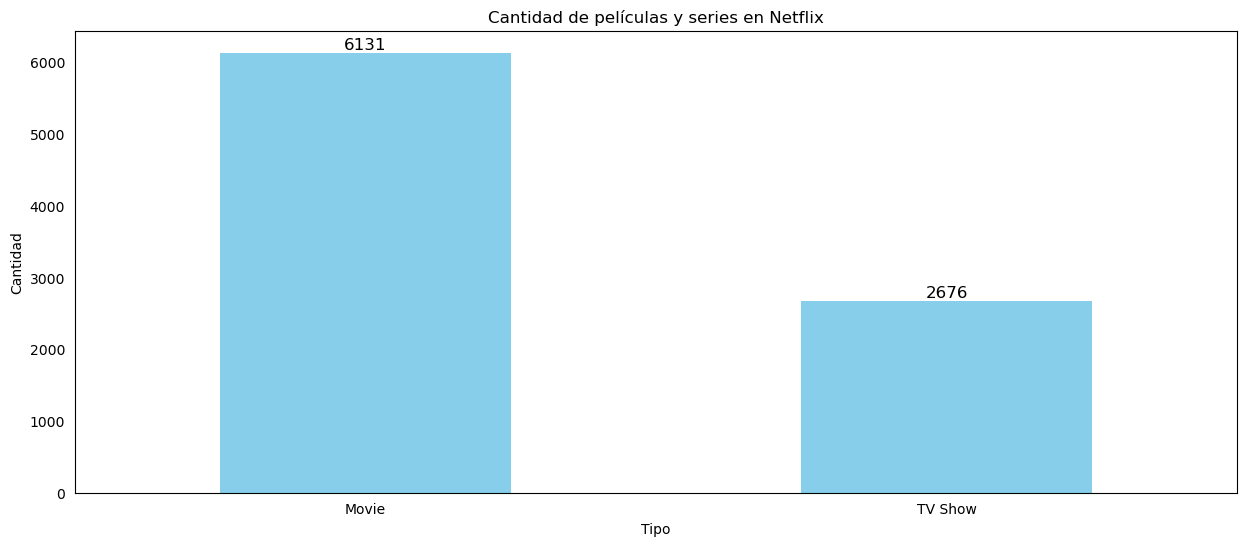

In [29]:
netflix_titles['type'].value_counts().plot(kind='bar', figsize=(15, 6), color='skyblue')
plt.title('Cantidad de películas y series en Netflix')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')

for i in range(len(netflix_titles['type'].value_counts())):
    plt.text(i, netflix_titles['type'].value_counts()[i] + 50, 
             netflix_titles['type'].value_counts()[i], 
             ha='center', fontsize=12)


plt.xticks(rotation=0)
plt.tick_params(left=False, bottom=False)

plt.show()

Para reducir la carga cognitiva se decidió lo siguiente:

- Colores más suaves: Se decidió utilizar colores más suaves para que la visualización no sea tan agresiva a la vista.
- Títulos claros: Se decidió utilizar títulos claros y concisos para que el mensaje a transmitir sea más fácil de entender.
- Gráficos sencillos: Se decidió utilizar gráficos sencillos para que la visualización sea más fácil de entender.
- Etiquetas de valores: Se decidió utilizar etiquetas de valores para que el usuario pueda entender la visualización de manera más sencilla.

#### Los directores más populares en Netflix son Rajiv Chilaka, Raúl Campos y Marcus Raboy.

C:\Users\marka\AppData\Local\Temp\ipykernel_54988\2426779987.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(directors[i], i, str(directors[i]), va='center', fontsize=12)


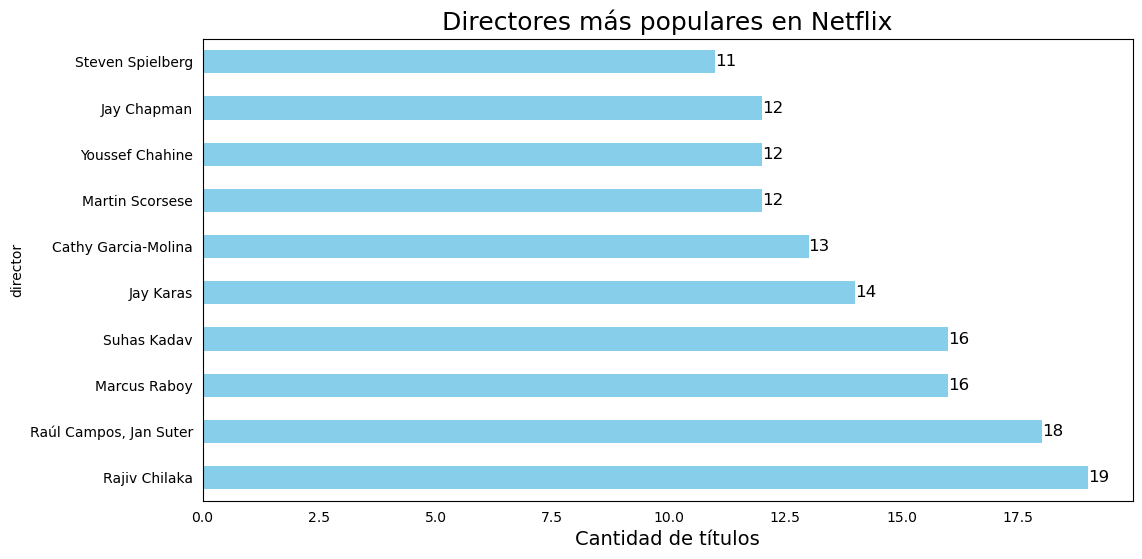

In [ ]:
directors = netflix_titles['director'].value_counts().head(10)

directors.plot(kind='barh', figsize=(12, 6), color='skyblue')

plt.title('Directores más populares en Netflix', fontsize=18)
plt.xlabel('Cantidad de títulos', fontsize=14)

for i in range(len(directors)):
    plt.text(directors[i], i, str(directors[i]), va='center', fontsize=12)

plt.tick_params(left=False, bottom=False)

plt.show()

Para reducir la carga cognitiva se decidió lo siguiente:

- Colores más suaves: Se decidió utilizar colores más suaves para que la visualización no sea tan agresiva a la vista.
- Títulos claros: Se decidió utilizar títulos claros y concisos para que el mensaje a transmitir sea más fácil de entender.
- Gráfico de barras horizontal: Se decidió utilizar un gráfico de barras horizontal para que la lectura de los nombres de los directores sea más fácil.
- Etiquetas de valores: Se decidió utilizar etiquetas de valores para que el usuario pueda entender la visualización de manera más sencilla.